In [232]:
import loompy
import numpy as np
import logging
import os
import matplotlib.pyplot as plt
from cytograph.preprocessing import Normalizer
from cytograph.enrichment.binary_differential_expression import BinaryDifferentialExpression
from diffxpy.api.test import pairwise
from goatools import obo_parser
import Bio

import logging
logger = logging.getLogger()
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%H:%M:%S')

import pickle as pkl

In [54]:
import sys
from Bio import Entrez

# *Always* tell NCBI who you are
Entrez.email = "john.doe@mail.com"
 
def retrieve_annotation(id_list):
 
    """Annotates Entrez Gene IDs using Bio.Entrez, in particular epost (to
    submit the data to NCBI) and esummary to retrieve the information. 
    Returns a list of dictionaries with the annotations."""
 
    # This below tests for search by gene symbol
    request = Entrez.epost("gene",id=",".join(id_list))
    try:
        result = Entrez.read(request)
    except RuntimeError as e:
        #FIXME: How generate NAs instead of causing an error with invalid IDs?
        print("An error occurred while retrieving the annotations.")
        print("The error returned was %s" % e)
        sys.exit(-1)
 
    webEnv = result["WebEnv"]
    queryKey = result["QueryKey"]
    data = Entrez.esummary(db="gene", webenv=webEnv, query_key =
            queryKey)
    annotations = Entrez.read(data)
 
    print("Retrieved %d annotations for %d genes" % (len(annotations), len(id_list)))
    return annotations

with loompy.connect(f) as ds:
    #Search for Gene ID, then find annotation
    id_list = []
    for x in ds.ra.Gene[:10]:
        sterm = x + "Homo Sapiens"
        handle = Entrez.esearch(db="gene", retmode = "xml", term = x )
        record = Entrez.read(handle)
        if len(record) > 0:
            IDArray = record["IdList"]
            toString = str(IDArray[0])
            print(f'{x}: {toString}')
            id_list.append(toString)

    annotation = retrieve_annotation(id_list)
    annotation = annotation['DocumentSummarySet']['DocumentSummary']

CDH19: 5371
KCNK10: 65272
SYT6: 351
SCN9A: 6323
U91319.1: 729993
ME1: 3845
CTXND1: 100039239
VGF: 3845
SPOCK1: 4313
GFRA1: 2100
Retrieved 1 annotations for 10 genes


In [53]:
for k in annotation:
#     print(k.keys())
    print(k['NomenclatureName'])

PML nuclear body scaffold
potassium two pore domain channel subfamily K member 10
amyloid beta precursor protein
sodium voltage-gated channel alpha subunit 1
shisa family member 9
KRAS proto-oncogene, GTPase
predicted gene 2115
KRAS proto-oncogene, GTPase
matrix metallopeptidase 2
estrogen receptor 2


In [233]:
f_dir = '/proj/GBM/FRESH_20210607'
f_GBM = os.path.join(f_dir, 'data' , 'GBM.loom')
f_agg = os.path.join(f_dir, 'data' , 'GBM.agg.loom')

In [30]:
with loompy.connect(f_GBM) as ds:
    print(ds.ra.Gene[:10])

['CDH19' 'KCNK10' 'SYT6' 'SCN9A' 'U91319.1' 'ME1' 'CTXND1' 'VGF' 'SPOCK1'
 'GFRA1']


In [172]:
with loompy.connect(f_GBM) as ds:
    print(ds.ra.Gene[:5])
    print(ds.ra.Accession[:5])
#     with loompy.connect(f_agg) as dsagg:        
#         Tumor_clusters = np.unique(ds.ca.Clusters[np.where(ds.ca.Subset=='Tumor')[0]])
#         print(dsagg.ca.AutoAnnotation[Tumor_clusters])

['GATA2' 'TNFRSF9' 'SPATA9' 'RGS13' 'RAB37']
['ENSG00000179348' 'ENSG00000049249' 'ENSG00000145757' 'ENSG00000127074'
 'ENSG00000172794']


In [173]:
with loompy.connect(f_GBM) as ds:
    Tumor_clusters = np.unique(ds.ca.Clusters[np.where(ds.ca.Subset=='Tumor')[0]])
    labels = np.array(['Tumor' if x in Tumor_clusters else 'Control' for x in ds.ca.Clusters])
    
#     BDE = BinaryDifferentialExpression()
#     logging.info(f'Fitting data')
#     BDE.fit(ds, labels)
#     logging.info(f'Calculate differential expression')
#     selected = BDE.select('Tumor', 'Control')
    
#     with open('/proj/GBM/FRESH_20210607/misc/differntial.pkl', "wb") as output_file:
#         pkl.dump([selected, BDE], output_file)

selected, BDE = pkl.load(open('/proj/GBM/FRESH_20210607/misc/differntial.pkl', 'rb'))

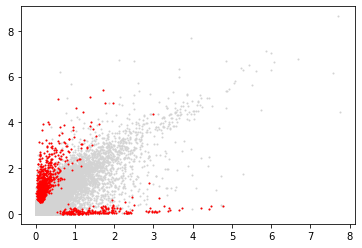

In [182]:
log2fc = np.log2((BDE.mu[:,1]+1)/(BDE.mu[:,0]+1))

plt.scatter(np.log2(BDE.mu[:,0] + 1), np.log2(BDE.mu[:,1] + 1), s=1, c='lightgrey')
plt.scatter(np.log2(BDE.mu[selected,0] + 1), np.log2(BDE.mu[selected,1] + 1), s=1, c='red')

['BBOX1' 'SEMA3A' 'DGKB' 'ADGRL3' 'PPAT' 'APCDD1' 'NKAIN4' 'FIBIN' 'RGS6'
 'PHKG1' 'FAT3' 'GRIA1' 'RNF180' 'CHST9' 'SOX13' 'KCND2' 'LHFPL3' 'CSPG5'
 'FGF12' 'UNC80' 'CSMD1' 'MEGF11' 'NTRK3' 'LRRTM4' 'SNTG1' 'CFAP54' 'CA3'
 'ID1' 'ARHGEF4' 'TIMP4' 'TRIL' 'ALDH1L1' 'FADS2' 'RGMA' 'ATP1B2' 'F3'
 'AEBP1' 'AQP4' 'CADPS' 'NRG3' 'GJA1' 'PTPN14' 'IGFBP5' 'SLC24A3' 'CDKN2B'
 'EGFR' 'SORCS3' 'EFEMP1' 'ARSJ' 'GAP43' 'RDH10' 'IGFBP2' 'SCG2' 'RGS17'
 'NRN1' 'HILPDA' 'AKAP12' 'AL035446.1' 'NQO1' 'NNMT' 'PTX3' 'FJX1' 'TSHZ2'
 'FABP7' 'AC073050.1' 'EMID1' 'FXYD1' 'MIR3681HG' 'LINC01965' 'MYBPC1'
 'IGF2BP2' 'CACNB2' 'HAS2' 'COL1A2' 'COL6A1' 'TMEM45A' 'TPM2' 'COL8A1'
 'LINC01748' 'ZNF273' 'LINC02588' 'TOM1L1' 'BCHE' 'AC016205.1' 'MAP2'
 'KIAA1211' 'SHC3' 'GRIK2' 'GSTA4' 'CNTN1' 'TMEM100' 'AC021088.1' 'BMP7'
 'EEF1A2' 'ALDH7A1' 'ADORA1' 'TRIM9' 'PSPH' 'TRIB2' 'RAD18']
819


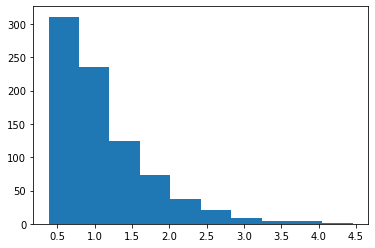

In [239]:
with loompy.connect(f_GBM) as ds:
    targets = selected & (log2fc > 0)
    Selected_genes = ds.ra.Gene[targets]
    plt.hist(log2fc[x])
print(Selected_genes[:100])
print(np.sum(targets))

['Age', 'Agetext', 'Ageunit', 'All_fc_analysis_id', 'Analysis', 'BpLength', 'CDNAConc', 'CellConc', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'CellID', 'Cellconc', 'Chemistry', 'Clusters', 'ClustersModularity', 'ClustersSurprise', 'Cmobarcodes', 'Comment', 'CreationDate', 'Datecaptured', 'Donor', 'DoubletFinderFlag', 'DoubletFinderScore', 'Editat', 'Editby', 'FinalConc', 'Id', 'IsCycling', 'Label', 'MT_ratio', 'MeanTotalUMI', 'Method', 'NGenes', 'Name', 'Neuronprop', 'Numpooledanimals', 'Outliers', 'OutliersModularity', 'OutliersSurprise', 'PCA', 'PCRCycles', 'Plugdate', 'Project', 'RegionOfInterest', 'Roi', 'SampleID', 'SampleName', 'Sampleok', 'Sex', 'Shortname', 'Species', 'Strain', 'Subset', 'TSNE', 'TargetNumCells', 'Targetnumcells', 'Tissue', 'TotalUMI', 'Transcriptome', 'UMAP', 'UMAP3D', '_X', '_Y', 'passedQC', 'unspliced_ratio', 'velocyto.__version__', 'velocyto.logic']
[3.06880789]
[[0.02908945 0.51944925]]
[7.89110426]
['EGFR', 'SRR', 'AR', 'BCR', 'LIFR', '

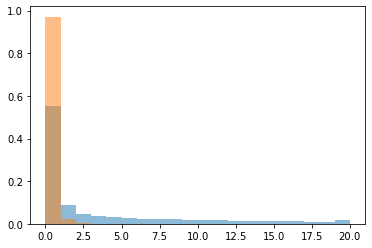

In [449]:
gene = 'AQP4'
with loompy.connect(f_GBM) as ds:
    print(ds.ca.keys())
    x = np.where([x in Tumor_clusters for x in ds.ca.Clusters])[0]
    plt.hist(ds[np.where(ds.ra.Gene==gene)[0],:][:,x].flatten(), bins=20, range=(0,20), alpha=.5, density=True)
    x = np.where([x not in Tumor_clusters for x in ds.ca.Clusters])[0]
    plt.hist(ds[np.where(ds.ra.Gene==gene)[0],:][:,x].flatten(), bins=20, range=(0,20), alpha=.5, density=True)
    print(log2fc[ds.ra.Gene==gene])
    print(BDE.fnnz[ds.ra.Gene==gene,:])
    print(mu_[ds.ra.Gene==gene])
print([x for x in Selected_genes if x[-1] == 'R'])

Fraction where AQP4 higher in reference: [0.]
Number of genes higher in reference: 21221
[7.89110426]
Fraction where AQP4 higher in reference: [0.]
Number of genes higher in reference: 10746
[7.89110426]
(58833, 21)
Fraction where AQP4 higher in reference: [0.]
Number of genes higher in reference: 17939
(58833, 35)
Fraction where AQP4 higher in reference: [0.]
Number of genes higher in reference: 25890
Fraction where AQP4 higher in reference: [0.]
Number of genes higher in reference: 4019
[7.89110426]
37797


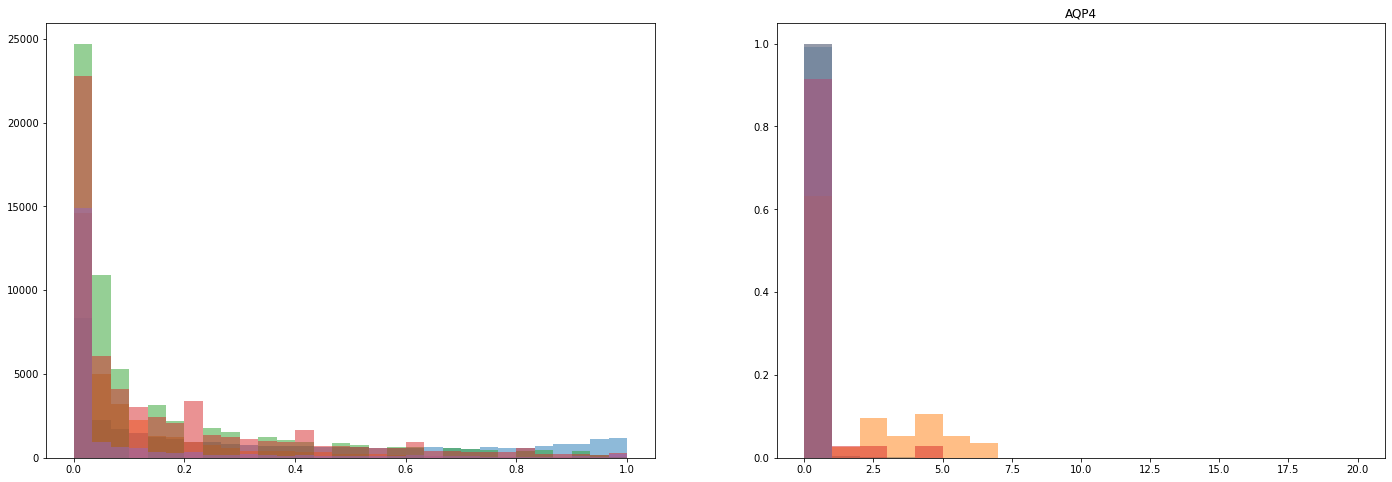

In [457]:
kim = ['/proj/human_adult/20210611/alldonors/PoolSplit/data/alldonors_A.agg.loom',
       '/proj/human_adult/20210611/alldonors/PoolSplit/data/alldonors_B.agg.loom']

Tabula = ['/proj/loom/TabulaSapiens/aggregated/TS_Spleen.agg.loom',
         '/proj/loom/TabulaSapiens/aggregated/TS_Lung.agg.loom']
f_Payen = '/proj/DEV_ATAC/RNA/LIVER_20210709/data/All.agg.loom'


invalid = []
n_exclude = .1
mu_ = BDE.mu[:,1]

fig, ax = plt.subplots(1,2, figsize=(24,8))
ax = ax.flatten()

for f in kim:
    with loompy.connect(f_GBM, 'r') as dsG:
        with loompy.connect(f, 'r') as ds:
            ## 
            X = ds[''][:,:]

            match = {k:v for k, v in zip(dsG.ra.Gene, mu_)}
            mu = np.array([match[x] for x in ds.ra.Gene])
            higher = np.mean(X>mu[:,np.newaxis], axis=1)
            ax[0].hist(higher, bins=30, alpha=.5)
            invalid.append(ds.ra.Gene[higher > n_exclude])
            print(f'Fraction where {gene} higher in reference: {higher[ds.ra.Gene==gene]}')
            print(f'Number of genes higher in reference: {np.sum(higher > n_exclude)}')
            print(mu[ds.ra.Gene==gene])

            dat = X[ds.ra.Gene==gene,:].reshape(-1)
            ax[1].hist(dat, bins=20, range=(0,20), alpha=.5, density=True)
        
for f in Tabula:
    with loompy.connect(f_GBM, 'r') as dsG:
        with loompy.connect(f, 'r') as ds:
            print(ds.shape)
            X = ds[''][:,:]

            match = {k:v for k, v in zip(dsG.ra.Gene, mu_)}
            for k in ds.ra.gene_symbol:
                if k not in match:
                    match[k] = 0
            mu = np.array([match[x] for x in ds.ra.gene_symbol])
            higher = np.mean(X>mu[:,np.newaxis], axis=1)
            ax[0].hist(higher, bins=30, alpha=.5)
            invalid.append(ds.ra.gene_symbol[higher > n_exclude])
            print(f'Fraction where {gene} higher in reference: {higher[ds.ra.gene_symbol==gene]}')
            print(f'Number of genes higher in reference: {np.sum(higher > n_exclude)}')

            dat = X[ds.ra.gene_symbol==gene,:].reshape(-1)
            ax[1].hist(dat, bins=20, range=(0,20), alpha=.5, density=True)
    
with loompy.connect(f_GBM, 'r') as dsG:
    with loompy.connect(f_Payen, 'r') as ds:
        ## 
        X = ds[''][:,:]

        match = {k:v for k, v in zip(dsG.ra.Gene, mu_)}
        for k in ds.ra.Gene:
            if k not in match:
                match[k] = 0
        mu = np.array([match[x] for x in ds.ra.Gene])
        higher = np.mean(X>mu[:,np.newaxis], axis=1)
        ax[0].hist(higher, bins=30, alpha=.5)
        invalid.append(ds.ra.Gene[higher > n_exclude])
        print(f'Fraction where {gene} higher in reference: {higher[ds.ra.Gene==gene]}')
        print(f'Number of genes higher in reference: {np.sum(higher > n_exclude)}')
        print(mu[ds.ra.Gene==gene])

        dat = X[ds.ra.Gene==gene,:].reshape(-1)
        ax[1].hist(dat, bins=20, range=(0,20), alpha=.5, density=True)
    
ax[1].set_title(gene)
            
invalid = np.unique([x for s in invalid for x in s])
print(len(invalid))

In [458]:
filtered_targets = Selected_genes[[x not in invalid for x in Selected_genes]]
print(len(filtered_targets))
print(filtered_targets)
np.savetxt("/proj/GBM/FRESH_20210607/misc/GBM_markers.csv",filtered_targets, delimiter =" ",  fmt ='% s')

252
['BBOX1' 'NKAIN4' 'PHKG1' 'CSPG5' 'CA3' 'ID1' 'TIMP4' 'TRIL' 'FADS2'
 'RGMA' 'ATP1B2' 'F3' 'AQP4' 'IGFBP5' 'CDKN2B' 'EGFR' 'EFEMP1' 'ARSJ'
 'RDH10' 'IGFBP2' 'HILPDA' 'AKAP12' 'AL035446.1' 'NQO1' 'PTX3' 'FJX1'
 'FABP7' 'EMID1' 'MIR3681HG' 'LINC01965' 'MYBPC1' 'IGF2BP2' 'HAS2'
 'COL1A2' 'COL8A1' 'LINC02588' 'AC016205.1' 'AC021088.1' 'BMP7' 'ALDH7A1'
 'PSPH' 'TUBG1' 'FERMT2' 'MIR4458HG' 'SRR' 'PCDHB4' 'AC092958.1' 'LYPD1'
 'BLM' 'ITGA7' 'ETV1' 'ELOVL2' 'ARHGEF26' 'BRCA1' 'PTGFRN' 'AGMO' 'UHRF1'
 'RND2' 'BCAN' 'LAPTM4B' 'LINC00511' 'C1QL1' 'FIRRE' 'RBP1' 'AC125613.1'
 'FHL1' 'KIF9' 'TCTN1' 'SPACA9' 'CETN2' 'CAPS' 'IFT22' 'EFHC1' 'DNALI1'
 'SPATA17' 'MORN2' 'CCDC173' 'AC105942.1' 'RFX4' 'EVA1C' 'SALL3' 'PRAF2'
 'SYTL4' 'HEPACAM' 'HEPN1' 'WLS' 'FUZ' 'BAALC-AS1' 'SOX9' 'TRIM47' 'P2RY1'
 'ID4' 'SOX2' 'ACKR3' 'LINC01896' 'CRISPLD1' 'AC234582.1' 'RHPN2'
 'GNG12-AS1' 'PARD6G-AS1' 'TCF7L1' 'ZIC1' 'LIFR' 'FAM181B' 'MLC1' 'PRRX1'
 'EMP1' 'TGFB2' 'ARRDC4' 'SH3BGR' 'NMB' 'IGFBP7' 'SPARCL1' 'SLC44A

In [326]:
print([x for x in filtered_targets if x[-1] == 'R'])

['MINCR', 'F2R']


In [438]:
with loompy.connect('/proj/loom/TabulaSapiens/TS_Spleen.loom') as ds:
    print(ds.ca.keys())
    print(ds.ra.keys())
    print(np.unique(ds.ca.Annotation))

['Anatomical Information', 'Annotation', 'Clusters', 'Compartment', 'Donor', 'Manually Annotated', 'Method', 'Organ', 'Predictability', 'X_umap', 'obs_names']
['ensembl_id', 'gene_length', 'gene_symbol', 'var_names']
['cd4-positive, alpha-beta memory t cell'
 'cd8-positive, alpha-beta memory t cell'
 'cd8-positive, alpha-beta t cell' 'classical monocyte'
 'conventional dendritic cell type i'
 'conventional dendritic cell type ii' 'endothelial cell' 'erythrocyte'
 'innate lymphoid cell' 'macrophage' 'mature nk t cell' 'memory b cell'
 'naive b cell' 'naive thymus-derived cd4-positive, alpha-beta t cell'
 'naive thymus-derived cd8-positive, alpha-beta t cell'
 'natural killer cell' 'neutrophil' 'plasma cell'
 'plasmacytoid dendritic cell' 'platelet' 'regulatory t cell']


In [437]:
Tabula = ['/proj/loom/TabulaSapiens/TS_Spleen.loom',
         '/proj/loom/TabulaSapiens/TS_Lung.loom']

for f in Tabula:
    out_file = os.path.join('/', *f.split('/')[:-1], 'aggregated', f.split('/')[-1].split('.')[0] + '.agg.loom')
    with loompy.connect(f) as ds:
        if not 'Clusters' in ds.ca:
            match = {k:v for v,k in enumerate(np.unique(ds.ca.Annotation))}
            ds.ca.Clusters = np.array([match[x] for x in ds.ca.Annotation])
        agg_spec = {
            "Annotation": "first",
            "Clusters": "first",
            "Sex": "tally",
            "Organ": "tally",
            "Donor": "tally",
            "Method": "tally",
            "Compartment": "tally",
            "Anatomical Information": "tally"
        }
        labels = ds.col_attrs["Annotation"]
        n_labels = len(set(labels))

        logging.info("Aggregating clusters")
        ds.aggregate(out_file, None, "Clusters", "mean", agg_spec)

17:13:19 INFO     Aggregating clusters
17:13:30 INFO     Aggregating clusters


In [18]:
obo_path = '/datb/sl/camiel/tumor/ref/go-basic.obo'

go = obo_parser.GODag(obo_path)

relevant_terms = []
key_word = 'cell surface'

for go_term in go:
    if key_word in go[go_term].name:
        relevant_terms.append(go_term)
        
logging.info(f'{len(relevant_terms)} relevant terms out of {len(go.keys())}')

17:03:19 INFO     32 relevant terms out of 47230
